In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
main_dir = "drum_beats_16bits"

BATCH_SIZE = 32
AUDIO_LENGTH = 88200
AUDIO_CHANNELS = 2
NUM_SAMPLES = 40

In [3]:
dataset = tf.keras.utils.audio_dataset_from_directory(
    main_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

Found 9760 files belonging to 10 classes.


In [4]:
type(dataset)

tensorflow.python.data.ops.padded_batch_op._PaddedBatchDataset

In [5]:
import numpy as np

for audio_data, label in dataset.take(2):
    print(audio_data.shape)
    print(label) 

(32, 88200, 2)
tf.Tensor([8 4 6 1 8 6 8 6 8 6 8 5 8 5 6 1 4 1 5 0 8 2 2 1 8 4 2 2 8 1 4 4], shape=(32,), dtype=int32)
(32, 88200, 2)
tf.Tensor([2 2 2 5 4 6 2 6 6 5 6 4 2 4 8 6 2 4 8 5 4 2 6 8 2 8 1 6 5 8 5 1], shape=(32,), dtype=int32)


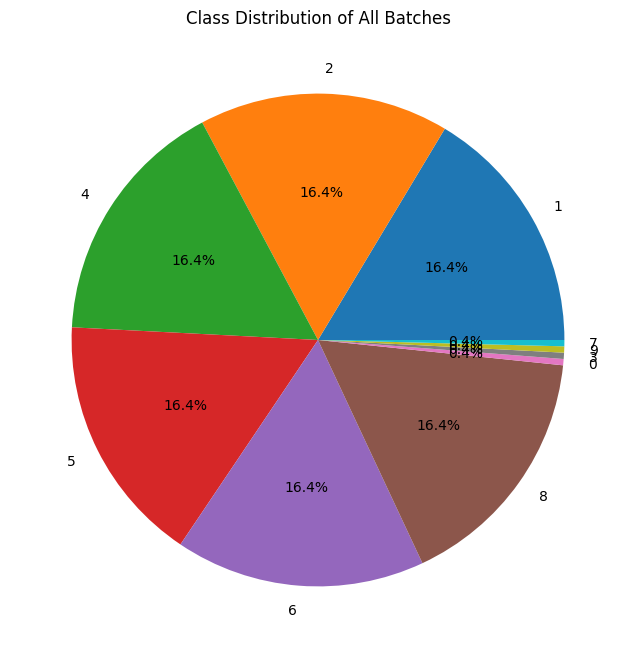

In [6]:
import matplotlib.pyplot as plt
import numpy as np

label_counts = {}

for _, label in dataset:
    label_np = label.numpy()
    unique_labels, counts = np.unique(label_np, return_counts=True)
    for label, count in zip(unique_labels, counts):
        if label in label_counts:
            label_counts[label] += count
        else:
            label_counts[label] = count

unique_labels = list(label_counts.keys())
label_counts = list(label_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title('Class Distribution of All Batches')
plt.show()

for weighting the classes; 
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [7]:
for audio_batch, label_batch in dataset.take(1):
    print(audio_batch[0].shape)

(88200, 2)


In [8]:
class_names = dataset.class_names
class_names

['bass',
 'bass_snare',
 'bass_toms',
 'overheads',
 'overheads_bass',
 'overheads_snare',
 'overheads_toms',
 'snare',
 'snare_toms',
 'toms']

In [9]:
len(dataset)

305

In [10]:
5*32

160

In [11]:
### REQUIRES INSTALLATION OF FFMPEG. SEE: https://www.youtube.com/watch?v=jZLqNocSQDM&t=167s
!pip install pydub


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
for audio_batch, label_batch in dataset.take(2):
    print(audio_batch.shape) ### Retrieves (batch size, length of sample[in time steps], number of channels) 
    print(label_batch.numpy()) ### Retrieves the classes of each sample in that particular batch

(32, 88200, 2)
[2 2 4 8 6 8 6 1 2 8 4 1 2 6 5 8 2 6 1 5 6 2 8 4 4 6 5 1 4 8 5 6]
(32, 88200, 2)
[1 6 5 8 5 8 2 5 1 1 5 6 8 2 6 6 5 8 8 5 4 2 4 8 5 2 1 4 2 4 5 4]


In [13]:
for audio_batch, label_batch in dataset.take(2): ### Retrieves numpy array for first audio sample 
    print(audio_batch[1].numpy())                ### Rows represents a time step 
                                                 ### Columns represent the channel; left or right
                                                 ### Each value in the array represents the amplitude of the audio signal at a specific time and channel

[[ 1.9226074e-03  1.8615723e-03]
 [ 2.8381348e-03  2.7465820e-03]
 [ 2.8381348e-03  2.6550293e-03]
 ...
 [-9.1552734e-05 -1.2207031e-04]
 [-9.1552734e-05 -1.8310547e-04]
 [-9.1552734e-05 -1.8310547e-04]]
[[-3.0517578e-05 -3.0517578e-05]
 [-1.2207031e-04 -3.0517578e-05]
 [-9.1552734e-05 -3.0517578e-05]
 ...
 [-9.1552734e-05  1.8310547e-04]
 [-6.1035156e-05  3.6621094e-04]
 [-1.8310547e-04  9.1552734e-05]]


In [14]:
for audio_batch, label_batch in dataset.take(1):
    print(audio_batch[0].shape)

(88200, 2)


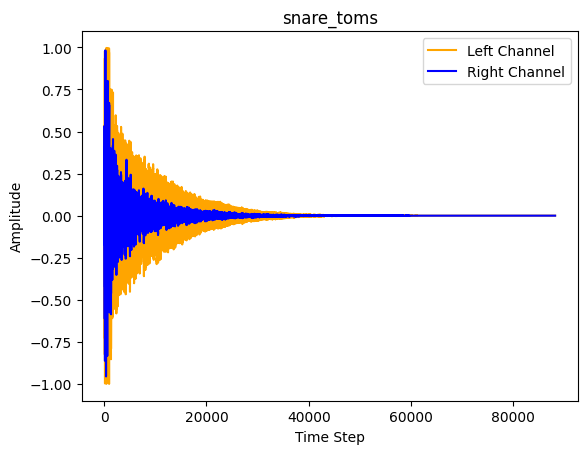

In [15]:
drum_idx = 0
audio_waveform = audio_batch[drum_idx].numpy()

left_channel = audio_waveform[:, 0]  
right_channel = audio_waveform[:, 1]  

plt.plot(left_channel, color='orange', label='Left Channel')

plt.plot(right_channel, color='blue', label='Right Channel')

plt.xlabel('Time Step')
plt.ylabel('Amplitude')
plt.title(class_names[label_batch[drum_idx]])
plt.legend()
plt.show()

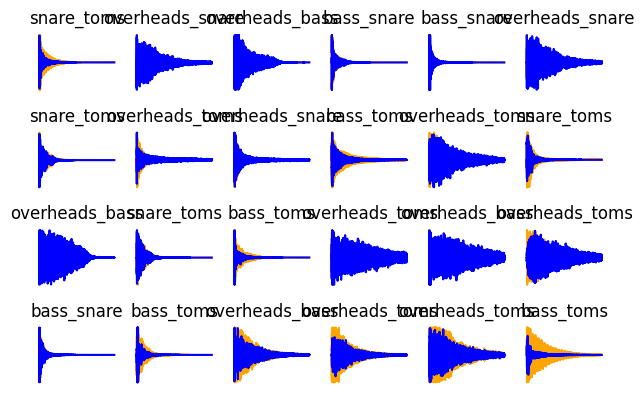

In [16]:
plt.figure(figsize=(6,6))
for i in range(24):
    ax = plt.subplot(6, 6, i + 1)
    
    # Plot the waveform of the audio sample
    plt.plot(audio_batch[i].numpy()[:, 0], color='orange')  # Left channel
    plt.plot(audio_batch[i].numpy()[:, 1], color='blue')  # Right channel
    
    plt.title(class_names[label_batch[i]])  # Assuming label_batch contains class indices
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.axis("off")

plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras.layers.experimental import preprocessing

normalization_layer = preprocessing.Normalization()

for audio, _ in dataset:
    normalization_layer.adapt(audio[:, :, 0])  
    normalization_layer.adapt(audio[:, :, 1])

normalized_dataset = dataset.map(lambda audio, label: (normalization_layer(audio[:, :, 0]), label))

for audio, label in normalized_dataset.take(1):
    print(audio, label)


tf.Tensor(
[[-3.1748331e-01  1.2150002e-01 -1.9059134e-01 ...  7.2051281e-01
   4.6284050e-01  3.6395562e-01]
 [-5.6461668e-01 -2.4229683e-01 -4.7651148e-01 ... -1.0372600e-01
  -2.4523996e-01 -3.3180022e-01]
 [-2.9463905e-01  6.3992620e-02 -2.1774103e-01 ... -5.6478457e+00
  -5.4829903e+00 -5.0954618e+00]
 ...
 [-3.0709955e-01  1.0774825e-01 -2.1816523e-01 ... -3.4807380e-03
  -1.4299007e-01 -2.1450806e-01]
 [-4.0886033e-01  7.0243418e-02 -3.1658286e-01 ... -4.5249596e-02
  -2.0178376e-01 -2.5449404e-01]
 [-1.6172698e-01  2.7651998e-01 -1.4859417e-01 ...  5.2211072e-02
   2.2766575e-01 -1.0787881e-01]], shape=(32, 88200), dtype=float32) tf.Tensor([4 8 5 5 5 6 8 6 8 8 2 5 2 6 1 1 8 6 2 6 6 5 8 5 8 4 6 5 2 2 8 4], shape=(32,), dtype=int32)


In [18]:
len(dataset)

305

In [19]:
5*32

160

In [20]:
EPOCHS=20

60% ==> training
40% ==> 10% validation 10% test

train_size = 0.6
len(dataset)*train_size

train_ds = dataset.take(3)
len(train_ds)

remaining_ds = dataset.skip(3)
len(remaining_ds)

val_size = 0.2
len(dataset)*val_size

val_ds = remaining_ds.take(1)
len(val_ds)

test_ds = remaining_ds.skip(1)
len(test_ds)

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=160):  ###Consider Shuffle Size

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=42)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds =  ds.skip(train_size).take(val_size)
    test_ds =  ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

183

In [24]:
len(val_ds)

61

In [25]:
len(test_ds)

61

In [26]:
train_ds = train_ds.cache().shuffle(160).prefetch(buffer_size=tf.data.AUTOTUNE)      ###Training time optimization 
val_ds = val_ds.cache().shuffle(160).prefetch(buffer_size=tf.data.AUTOTUNE)          ###Caching will retain selected image from HD in to memory
test_ds = train_ds.cache().shuffle(160).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
def min_max_scaling(x):
    min_val = tf.reduce_min(x, axis=(1, 2), keepdims=True)
    max_val = tf.reduce_max(x, axis=(1, 2), keepdims=True)
    return (x - min_val) / (max_val - min_val)

In [28]:
rescaled = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(scale=min_max_scaling)
])                                                                       ###Excluding resizing. May not be necessary for non-spatial data.

In [29]:
n_classes = 10

normalization_layer = layers.experimental.preprocessing.Normalization()
scaling_layer = layers.experimental.preprocessing.Rescaling(scale=1./32768)  # Assuming 16-bit audio
    
model = models.Sequential([
    #normalization_layer,
    #scaling_layer,
    layers.Conv1D(32,(3), activation='relu', input_shape=(AUDIO_LENGTH, AUDIO_CHANNELS)),
    layers.MaxPooling1D((2)),
    layers.Conv1D(64,(3), activation='relu'),
    layers.MaxPooling1D((2)),
    layers.Conv1D(64,(3), activation='relu'),
    layers.MaxPooling1D((2)),
    layers.Conv1D(64,(3), activation='relu'),
    layers.MaxPooling1D((2)),
    layers.Conv1D(64,(3), activation='relu'),
    layers.MaxPooling1D((2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=(None, AUDIO_LENGTH, AUDIO_CHANNELS))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 88198, 32)         224       
                                                                 
 max_pooling1d (MaxPooling1  (None, 44099, 32)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 44097, 64)         6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 22048, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 22046, 64)         12352     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 11023, 64)        

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20


183/183 [==============================] - 807s 4s/step - loss: 0.4014 - accuracy: 0.8731 - val_loss: 0.0518 - val_accuracy: 0.9816
Epoch 2/20
183/183 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9816

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validaton Accuracy')

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validaton Loss')

In [ ]:
import numpy as np

predicted_labels = []
actual_labels = []

for audio_batch, labels_batch in test_ds.take(1):
    # Make predictions for the entire batch
    batch_predictions = model.predict(audio_batch)
    
    # Iterate through each sample in the batch
    for i in range(len(audio_batch)):
        # Get the actual label
        actual_label = labels_batch[i].numpy()
        actual_labels.append(actual_label)
        
        # Get the predicted label
        predicted_label = np.argmax(batch_predictions[i])
        predicted_labels.append(predicted_label)
        
        print("Sample:", i)
        print("Actual Label:", actual_label)
        print("Predicted Label:", predicted_label)

# Convert lists to numpy arrays for easier manipulation if needed
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

In [ ]:
dataset2 = tf.keras.utils.audio_dataset_from_directory(
    "Unseen_Beats"
)

In [ ]:
for audio_batch, label_batch in dataset2.take(1):
    print(audio_batch[0].shape)

In [ ]:
import numpy as np

predicted_labels = []
actual_labels = []

for audio_batch, labels_batch in dataset2.take(1):
    # Make predictions for the entire batch
    batch_predictions = model.predict(audio_batch)
    
    # Iterate through each sample in the batch
    for i in range(len(audio_batch)):
        # Get the actual label
        actual_label = labels_batch[i].numpy()
        actual_labels.append(actual_label)
        
        # Get the predicted label
        predicted_label = np.argmax(batch_predictions[i])
        predicted_labels.append(predicted_label)
        
        print("Sample:", i)
        print("Actual Label:", actual_label)
        print("Predicted Label:", predicted_label)

# Convert lists to numpy arrays for easier manipulation if needed
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

In [ ]:
class_names = dataset2.class_names
class_names

In [ ]:
predicted_labels = []
actual_labels = []

for audio_batch, labels_batch in dataset2.take(1):
    # Make predictions for the entire batch
    batch_predictions = model.predict(audio_batch)
    
    # Iterate through each sample in the batch
    for i in range(len(audio_batch)):
        # Get the actual label
        actual_label = labels_batch[i].numpy()
        actual_label_name = class_names[actual_label]  # Get the class name corresponding to the actual label
        actual_labels.append(actual_label_name)
        
        # Get the predicted label
        predicted_label = np.argmax(batch_predictions[i])
        predicted_label_name = class_names[predicted_label]  # Get the class name corresponding to the predicted label
        predicted_labels.append(predicted_label_name)
        
        print("Audio:", i)
        print("Actual Label:", actual_label_name)
        print("Predicted Label:", predicted_label_name)

# Convert lists to numpy arrays for easier manipulation if needed
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

In [ ]:
### Versioning. Automates process of saving and naming the new version of the model.
### View from 26 minutes:
### https://www.youtube.com/watch?v=ZN6P_GEJ7lk&list=PLeo1K3hjS3ut49PskOfLnE6WUoOp_2lsD&index=3

def save_model(model, directory):
    """
    Save a trained model to a directory with a new version number.
    
    Args:
        model: The trained model to be saved.
        directory: The directory where the models are saved. Default is "../models".
        
    Returns:
        None
    """
    # Create the directory if it does not exist
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Find the next available model version number
    model_versions = [int(i) for i in os.listdir(directory) + [0]]
    model_version = max(model_versions) + 1
    
    # Save the model with the new version number
    model.save(os.path.join(directory, str(model_version)))


In [ ]:
directory = "../models"                                                                                                                          
save_model(model, directory)